<a href="https://colab.research.google.com/github/chiusanghung/BTweek5/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

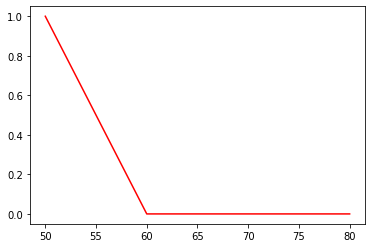

In [57]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.arange(50,81,1)
slow = fuzz.trimf (x, [50,50,60])
plt.figure()
slow = fuzz.trimf (x, [50,50,60])
plt.figure()
slow = fuzz.trimf (x, [50,50,60])
plt.figure()
plt.plot (x,slow,'r', linewidth = 1.5, label = 'slow')
plt.plot



16.91428571428571


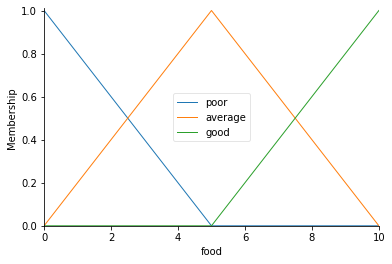

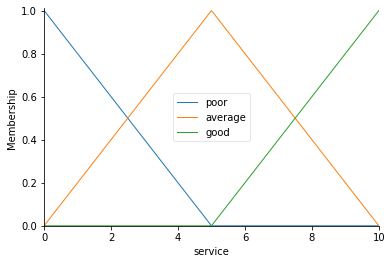

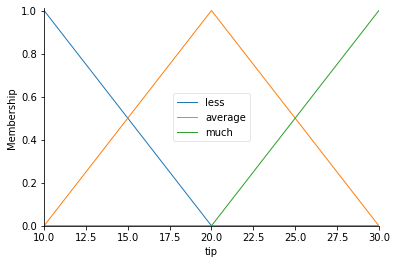

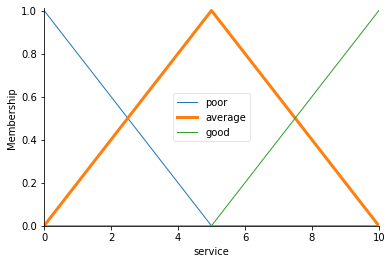

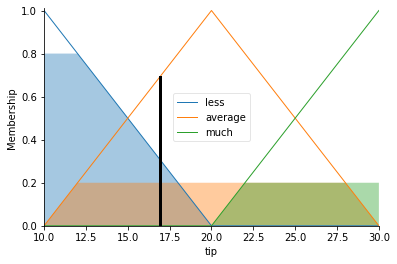

In [56]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent(np.arange(0,11,1), 'food')
service = ctrl.Antecedent(np.arange(0,11,1), 'service')
tip = ctrl.Consequent(np.arange(10,31,1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])

service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])

tip['less'] = fuzz.trimf(tip.universe, [10,10,20])
tip['average'] = fuzz.trimf(tip.universe, [10,20,30])
tip['much'] = fuzz.trimf(tip.universe, [20,30,30])

food.view()
service.view()
tip.view()
service['average'].view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['average'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['much'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['less'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 1
tipping.input['service'] = 1
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)

58.63291139240513


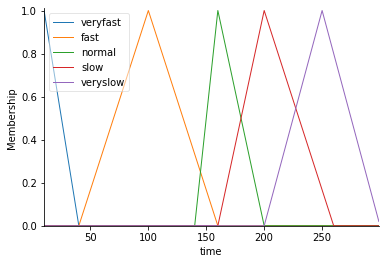

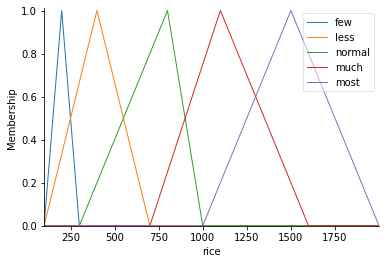

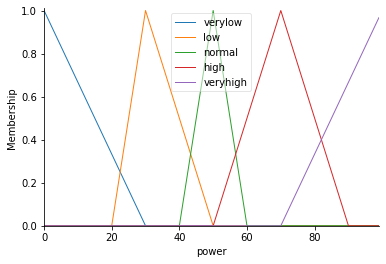

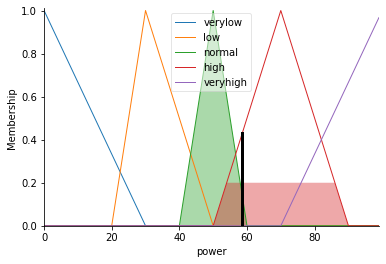

In [55]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,300,1), 'time')
rice = ctrl.Antecedent(np.arange(100,2000,1), 'rice')
power = ctrl.Consequent(np.arange(0,100,1), 'power')

time['veryfast'] = fuzz.trimf(time.universe, [10,10,40])
time['fast'] = fuzz.trimf(time.universe, [40,100,160])
time['normal'] = fuzz.trimf(time.universe, [140,160,200])
time['slow'] = fuzz.trimf(time.universe, [160,200,260])
time['veryslow'] = fuzz.trimf(time.universe, [200,250,300])

rice['few'] = fuzz.trimf(rice.universe, [100,200,300])
rice['less'] = fuzz.trimf(rice.universe, [100,400,700])
rice['normal'] = fuzz.trimf(rice.universe, [300,800,1000])
rice['much'] = fuzz.trimf(rice.universe, [700,1100,1600])
rice['most'] = fuzz.trimf(rice.universe, [1000,1500,2000])

power['verylow']= fuzz.trimf(power.universe,[0,0,30])
power['low']= fuzz.trimf(power.universe,[20,30,50])
power['normal']= fuzz.trimf(power.universe,[40,50,60])
power['high']= fuzz.trimf(power.universe,[50,70,90])
power['veryhigh']= fuzz.trimf(power.universe,[70,100,100])
rule = []

rule.append(ctrl.Rule(time['veryfast'] & rice['few'], power['normal']))
rule.append(ctrl.Rule(time['veryfast'] & rice['less'], power['high']))
rule.append(ctrl.Rule(time['veryfast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh']))
rule.append(ctrl.Rule(time['veryfast'] & rice['most'], power['veryhigh']))

rule.append(ctrl.Rule(time['fast'] & rice['few'], power['low']))
rule.append(ctrl.Rule(time['fast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['fast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['fast'] & rice['much'], power['veryhigh']))
rule.append(ctrl.Rule(time['fast'] & rice['most'], power['veryhigh']))

rule.append(ctrl.Rule(time['normal'] & rice['few'], power['verylow']))
rule.append(ctrl.Rule(time['normal'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['normal'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['normal'] & rice['much'], power['high']))
rule.append(ctrl.Rule(time['normal'] & rice['most'], power['veryhigh']))

rule.append(ctrl.Rule(time['slow'] & rice['few'], power['verylow']))
rule.append(ctrl.Rule(time['slow'] & rice['less'], power['verylow']))
rule.append(ctrl.Rule(time['slow'] & rice['normal'], power['low']))
rule.append(ctrl.Rule(time['slow'] & rice['much'], power['normal']))
rule.append(ctrl.Rule(time['slow'] & rice['most'], power['high']))

rule.append(ctrl.Rule(time['veryslow'] & rice['few'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['less'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['normal'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['much'], power['low']))
rule.append(ctrl.Rule(time['veryslow'] & rice['most'], power['normal']))

cooker_control = ctrl.ControlSystem(rule)
cooker_simulation = ctrl.ControlSystemSimulation(cooker_control)

time.view()
rice.view()
power.view()

cooker_simulation.input['rice'] = 400
cooker_simulation.input['time'] = 100

cooker_simulation.compute()

print(cooker_simulation.output['power'])
power.view(sim = cooker_simulation)